In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x: '%.2f' % x)
%matplotlib inline

In [101]:
# read for data by excel before cleaning
df=pd.read_excel('Data.xlsx')
df

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [103]:
df.shape #(number of row,number of column)

(11094, 9)

In [104]:
# remove symbol ₹ because convert to integer
df.Minimum_Order=df.Minimum_Order.str.replace('₹','')
df.Average_Cost =df.Average_Cost.str.replace('₹','')

# remove word ("minutes") because convert to integer
df.Delivery_Time =df.Delivery_Time.str.replace('minutes','')


In [105]:
# conver column Minimum_Order and Delivery_Time to integer type
df['Minimum_Order']=df.Minimum_Order.astype('int')
df['Delivery_Time']=df.Delivery_Time.astype('int')

In [106]:
#convert column to Float type
df['Average_Cost']=pd.to_numeric(df.Average_Cost,errors='coerce') 
df['Rating']=pd.to_numeric(df.Rating,errors='coerce')
#convert column to Float type

df['Votes']=pd.to_numeric(df.Votes,errors='coerce') 
df['Reviews']=pd.to_numeric(df.Reviews,errors='coerce')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     11094 non-null  object 
 1   Location       11094 non-null  object 
 2   Cuisines       11094 non-null  object 
 3   Average_Cost   11069 non-null  float64
 4   Minimum_Order  11094 non-null  int32  
 5   Rating         9131 non-null   float64
 6   Votes          9020 non-null   float64
 7   Reviews        8782 non-null   float64
 8   Delivery_Time  11094 non-null  int32  
dtypes: float64(4), int32(2), object(3)
memory usage: 693.5+ KB


In [108]:
#I tried to use fillna to answer the mean and add it back to the values, but I did not use replace 
Avg_Cost_mean=df.Average_Cost.mean()
df['Average_Cost']=df.Average_Cost.fillna(Avg_Cost_mean)


Rating_mean=df.Rating.mean()
df['Rating']=df.Rating.fillna(Rating_mean)


Votes_median=df.Votes.median()
df['Votes']=df.Votes.fillna(Votes_median)


Reviews_median=df.Reviews.median()
df['Reviews']=df.Reviews.fillna(Reviews_median)

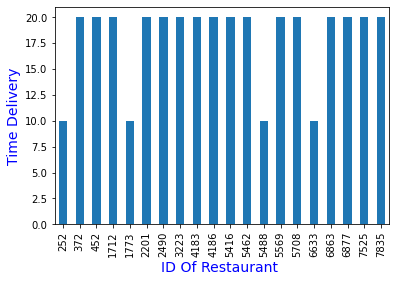

In [109]:
#Q1 The highest rated restaurants in terms of delivery speed?
ha_Rating=df[df['Rating']>=3.90 ]
ha_sample=ha_Rating.head(20)

less_Taime=df[df['Delivery_Time']<25 ]
less_sample=less_Taime.head(20)
less_sample.Delivery_Time.plot(kind='bar')
plt.xlabel("ID Of Restaurant ", color="b",size='14')
plt.ylabel("Time Delivery", color="b",size='14');



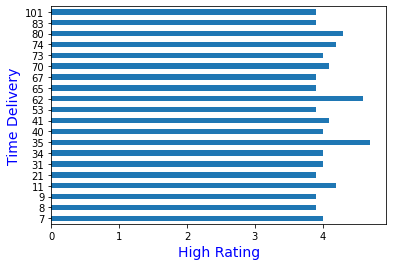

In [141]:
#q1 for Rating column
ha_sample.Rating.plot(kind='barh')
plt.xlabel("High Rating", color="b",size='14')
plt.ylabel("Time Delivery", color="b",size='14');


Text(0.5, 0, 'Minimum_Order')

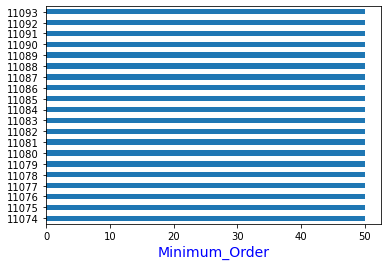

In [146]:
#q2 The least expensive restaurants for dinner?
order_sample=df[df['Minimum_Order']<=50].tail(20)
order_sample.Minimum_Order.plot(kind='barh')
plt.xlabel("Minimum_Order", color="b",size='14')


In [148]:
#q3 What is the most requested cuisine?
fre_Cuisines=df[df['Cuisines']=='North Indian']
fre_Cuisines.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
28,ID_5547,"Dockyard Road, Mumbai CST Area",North Indian,150.00,50,3.30,44.00,19.00,45
30,ID_425,"Gora Bazar, Rajbari, North Dumdum, Kolkata",North Indian,150.00,50,3.20,18.00,7.00,30
34,ID_3069,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",North Indian,100.00,50,4.00,581.00,111.00,30
44,ID_3869,"Tiretti, Kolkata",North Indian,200.00,50,3.60,106.00,32.00,30
87,ID_4179,"D-Block, Sector 63, Noida",North Indian,200.00,50,3.30,9.00,5.00,30
109,ID_7226,"Sector 14, Noida",North Indian,100.00,50,3.00,7.00,1.00,30
110,ID_2915,"MG Road, Pune",North Indian,200.00,50,3.30,28.00,9.00,30
119,ID_1996,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,150.00,50,3.61,63.00,26.00,30
122,ID_1885,Delhi Cantt.,North Indian,300.00,50,4.20,63.00,26.00,45
125,ID_5223,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",North Indian,100.00,50,3.90,70.00,9.00,30


In [147]:
df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.00,50,3.50,12.00,4.00,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.00,50,3.50,11.00,4.00,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.00,50,3.60,99.00,30.00,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.00,99,3.70,176.00,95.00,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.00,99,3.20,521.00,235.00,65
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150.00,50,3.80,46.00,18.00,30
6,ID_3777,Mumbai Central,"Beverages, Fast Food",150.00,50,3.70,108.00,31.00,30
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650.00,50,4.00,1731.00,1235.00,45
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",100.00,50,3.90,110.00,26.00,30
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200.00,50,3.90,562.00,294.00,65


In [114]:
#Q4 What is the average delivery order?
Delivery_Time=df['Delivery_Time'].median()
print(f"{Delivery_Time} minutes")



30.0 minutes
